In [22]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
tomato_classes = []
individual_disease = []
image_paths = []
labels = []
d=0
for leaves in os.listdir('drive/MyDrive/Tomato/'):
    d=d+1
    for image in os.listdir('drive/MyDrive/Tomato/' + str(leaves)):
        individual_disease.append('drive/MyDrive/Tomato/' + str(leaves) + '/' + str(image))
        labels.append(leaves)
        path=('drive/MyDrive/Tomato/' + str(leaves) + '/' + str(image))
        img = cv2.imread(path)
        im =cv2.resize(img,(28,28))
        image_paths.append(im)
    tomato_classes.append(individual_disease)
    individual_disease = []
print("Labels:", labels)

Labels: ['Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus', 'Tomato_yellowLeaf_Curl_Virus',

In [4]:
data_arr = np.array(image_paths)
label_arr = np.array(labels)

In [5]:
encoder = LabelEncoder()
y= encoder.fit_transform(label_arr)
x= data_arr/255

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=10)

In [7]:
x_train.shape

(3155, 28, 28, 3)

In [8]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [13]:
mod=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
25/25 [==============================] - 0s 13ms/step - loss: 1.0315 - accuracy: 0.6415 - val_loss: 1.1885 - val_accuracy: 0.5869
Epoch 2/10
25/25 [==============================] - 0s 18ms/step - loss: 0.9968 - accuracy: 0.6545 - val_loss: 1.1223 - val_accuracy: 0.5983
Epoch 3/10
25/25 [==============================] - 0s 14ms/step - loss: 0.9352 - accuracy: 0.6770 - val_loss: 1.0705 - val_accuracy: 0.6125
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 0.8919 - accuracy: 0.6891 - val_loss: 1.0960 - val_accuracy: 0.6154
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.8796 - accuracy: 0.6951 - val_loss: 1.0806 - val_accuracy: 0.6325
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.8386 - accuracy: 0.7094 - val_loss: 1.0187 - val_accuracy: 0.6553
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.8020 - accuracy: 0.7166 - val_loss: 1.0296 - val_accuracy: 0.6325
Epoch 8/10
25/25 

In [14]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

11/11 [==============================] - 0s 6ms/step - loss: 0.9932 - accuracy: 0.6752
Test Loss: 0.9932203888893127
Test accuracy: 0.6752136945724487


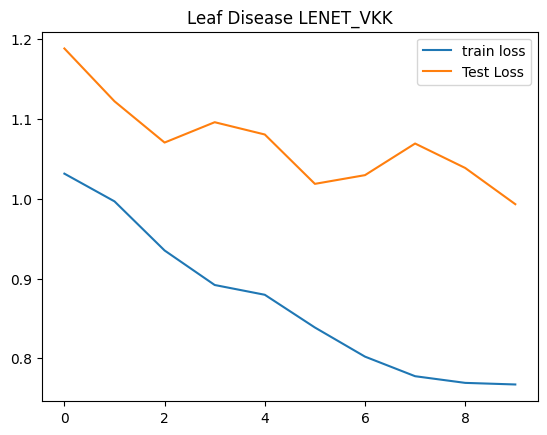

In [17]:
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='Test Loss')
plt.title("Leaf Disease LENET_VKK")
plt.legend()
plt.show()

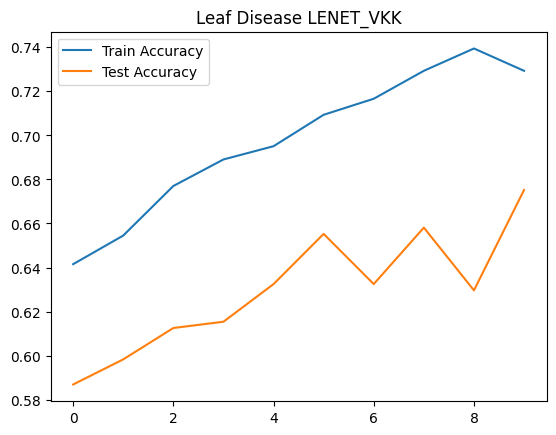

In [18]:
plt.plot(mod.history['accuracy'], label='Train Accuracy')
plt.plot(mod.history['val_accuracy'], label='Test Accuracy')
plt.title("Leaf Disease LENET_VKK")
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [20]:
y_pred = np.argmax(y_pred, axis=1)


In [23]:
print(classification_report(y_test, y_pred, labels=np.unique(y_test)))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71        30
           1       0.50      0.35      0.41        40
           2       0.48      0.34      0.40        32
           3       0.58      0.64      0.61        22
           4       0.78      0.82      0.80        22
           5       0.70      0.59      0.64        51
           6       0.64      0.80      0.71        40
           7       0.73      0.97      0.83        33
           8       0.81      0.70      0.75        56
           9       0.91      0.80      0.85        25

    accuracy                           0.68       351
   macro avg       0.67      0.69      0.67       351
weighted avg       0.67      0.68      0.66       351

